In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-lang-detect/housing_lang.csv


In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 928 kB/s            


In [3]:
data = pd.read_csv('/kaggle/input/housing-lang-detect/housing_lang.csv')

In [4]:
data.head()

,Unnamed: 0,adAvailableDate,adDescription,adLangDetected
0,0,not available,Appartement avec beaucoup de charme à louer à ...,fr
1,1,nach Vereinbarung,Die Highlights:<br />» Gut geschnittener Büror...,de
2,2,sofort,Für diese Wohnung suchen wir ein nettes Paar (...,de
3,3,sofort,<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it
4,4,sofort,"Attico mansardato, posto in elegante palazzina...",it


In [5]:
data.rename(columns = {'Unnamed: 0':'id'}, inplace=True)

In [6]:
data.head()

,id,adAvailableDate,adDescription,adLangDetected
0,0,not available,Appartement avec beaucoup de charme à louer à ...,fr
1,1,nach Vereinbarung,Die Highlights:<br />» Gut geschnittener Büror...,de
2,2,sofort,Für diese Wohnung suchen wir ein nettes Paar (...,de
3,3,sofort,<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it
4,4,sofort,"Attico mansardato, posto in elegante palazzina...",it


In [7]:
#there seems to be some missing values 
data.isnull().sum()

id                     0
adAvailableDate    19645
adDescription      28001
adLangDetected     28913
dtype: int64

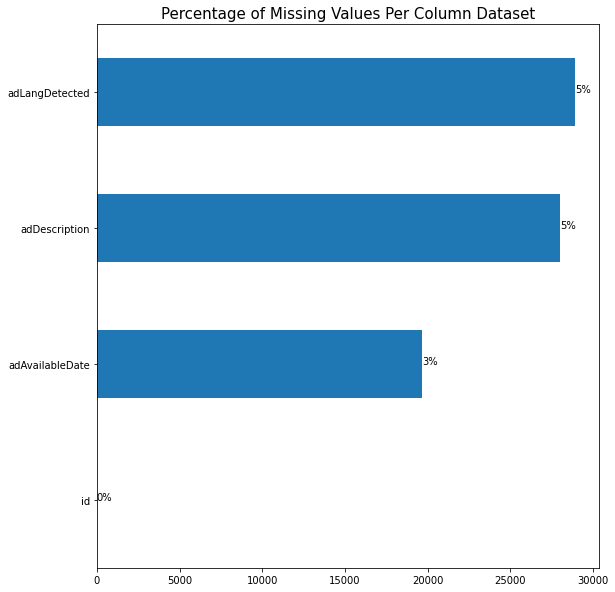

In [8]:
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [9]:
data.columns

Index(['id', 'adAvailableDate', 'adDescription', 'adLangDetected'], dtype='object')

In [10]:
langDetected, Description, AvailableData = data['adAvailableDate'], data['adDescription'], data['adLangDetected']

In [11]:
len(Description)

606948

In [12]:
data.isnull().sum().sort_values(ascending=False)

adLangDetected     28913
adDescription      28001
adAvailableDate    19645
id                     0
dtype: int64

In [13]:
#TODO
#resolve how to handle missing data

In [14]:
#Nan_values = [x for i in range(len(data)) if data['adLangDetected'].isna().values[i] == True]

In [15]:
"""Nan_values = []
for i in len(data):
    x = data['adLangDetected'].isna().values[i]
    if x == True:
        a.append(x)"""

"Nan_values = []\nfor i in len(data):\n    x = data['adLangDetected'].isna().values[i]\n    if x == True:\n        a.append(x)"

In [16]:
languages = list(data['adLangDetected'].unique())
languages

['fr', 'de', 'it', 'en', nan]

In [17]:
languages.pop(4)


nan

In [18]:
languages

['fr', 'de', 'it', 'en']

In [19]:
#drop missing data
data.dropna(axis=0, inplace=True)

In [20]:
data.shape

(578012, 4)

# Installing library for detecting language

In [21]:
!pip install langdetect

     |████████████████████████████████| 981 kB 921 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c5417cb4a82cf00989cd226e17553f56b24ccfa467c26cd2ed6209a0ccd6ec14
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


## Google api for translating 

In [22]:
!pip install itranslate

     |████████████████████████████████| 76 kB 899 kB/s            
     |████████████████████████████████| 58 kB 2.4 MB/s            
     |████████████████████████████████| 54 kB 1.6 MB/s             
  Attempting uninstall: h11
    Found existing installation: h11 0.13.0
    Uninstalling h11-0.13.0:
      Successfully uninstalled h11-0.13.0


In [23]:
#!pip install google_trans_new

In [24]:
!pip install -U deep-translator

In [25]:
from deep_translator import GoogleTranslator
#translated = GoogleTranslator(source=y, target='en')
#translate = translated.translate(x)
#translate

In [26]:
def translate(text, langDetect):
    trans = GoogleTranslator(source=langDetect, target='en').translate(text)
    return trans

In [27]:
data.reset_index(drop=True, inplace=True)

In [28]:
data['adDescription'][463:]

463       <b>"SUNNY" das sonnigste Wohnquartier von Dagm...
464       33 LOGEMENTS DE 2,5 À 4,5 PIÈCES<br />AU COEUR...
465       Cette villa jumelle par les garages est située...
466       <h3>Objektbeschreibung</h3><p>Wohnhaus schön r...
467       La bellissima duplice proprietà è situata nell...
                                ...                        
578007    <b>Minusio</b><br />Affittiamo in Casa Frances...
578008    La société Shifters déménage, besoin de plus d...
578009    L'appartement se situe au centre de la commune...
578010    Avec un grand potentiel - lumineux avec un emp...
578011    Die Wohnung verfügt über eine offene Küche mit...
Name: adDescription, Length: 577549, dtype: object

In [29]:
x, y = data['adDescription'][464], data['adLangDetected'][464]
x, y

('33 LOGEMENTS DE 2,5 À 4,5 PIÈCES<br />AU COEUR DU NOUVEL ÉCOQUARTIER "CÔTÉ RIVE"<br />DISPONIBILITE 1ER MARS 2021<br /><br />Faisant partie de la première phase de construction du quartier, le bâtiment est composé de cinq étages. Comportant 33 logements au total, il offre une variété de typologies allant du 2.5 pièces au 4.5 pièces.<br /><br />Les appartements sont conçus pour offrir des espaces de qualité en proposant une zone nuit desservant les chambres, un espace d\'entrée lumineux et une zone jour avec une loggia qui articule l\'espace entre le séjour et la cuisine.<br /><br />Construit avec des matériaux durables et locaux, toutes les mesures phoniques et thermiques ont été mises en oeuvre pour offrir un maximum de confort. Deux cages d\'escalier avec ascenseur permettent d\'accéder aux appartements. Deux niveaux de sous-sols relient les bâtiments entre eux, ils comprennent les caves, l\'abri PC, les locaux vélos et poussettes ainsi qu\'un parking commun.<br /><br />Le nouveau 

In [30]:
translate(x,y)

'33 APARTMENTS FROM 2.5 TO 4.5 ROOMS<br />IN THE HEART OF THE NEW "CÔTÉ RIVE" ECO-DISTRICT<br />AVAILABLE MARCH 1, 2021<br /><br />Part of the first phase of construction of the district , the building has five floors. Comprising 33 apartments in total, it offers a variety of typologies ranging from 2.5 rooms to 4.5 rooms.<br /><br />The apartments are designed to offer quality spaces by offering a sleeping area serving the bedrooms, a living space bright entrance and a day area with a loggia that articulates the space between the living room and the kitchen.<br /><br />Built with sustainable and local materials, all sound and thermal measures have been implemented to provide maximum comfort. Two stairwells with lift provide access to the apartments. Two basement levels connect the buildings to each other, they include the cellars, the PC shelter, the bicycle and stroller rooms as well as a common car park.<br /><br />The new Gruvatiez district plan is located south of the beautiful li

In [ ]:
adLangTranslated = []

In [ ]:
data.shape

In [ ]:
for i in range(len(data)):
    trans = translate(data['adDescription'].loc[i], data['adLangDetected'].loc[i])
    adLangTranslated.append(trans)

In [ ]:
#remove html tags in the description column
#df['ad'] = df['Grade'].str.replace('%', '')